<a href="https://colab.research.google.com/github/Ninadrmore1999/ML-projects-/blob/main/Healthyfy_me_customer_classification_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### You are a Data Scientist working for Healthyfi.me

Healthyfi.me has labelled it's customers based on the highest intensity of work they could perform - A, B, C and D

#### Task: Given a new customer, help Healthyfi.me in recommending  customised workout plans by predicting customer's class




## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

- Lets first download the HealthyfiMe dataset.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O healthyfime.csv

--2023-10-18 07:45:36--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 142.251.172.102, 142.251.172.139, 142.251.172.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.172.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sbnq5p2bu6hiq44n5cckfaibddmoe5sl/1697615100000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=450fb57c-4305-4cbc-b49d-610c4fc64b6c [following]
--2023-10-18 07:45:37--  https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sbnq5p2bu6hiq44n5cckfaibddmoe5sl/1697615100000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=450fb57c-4305-4cbc-b49d-610c4fc64b6c
Resolving doc-0s-50-docs.googleusercontent.com (doc-0s-50-docs.googleusercontent.com)... 74.125.124.132, 2

In [ ]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


**From the above snippet of data, we can have the following observations:**
- Data has an age column which is definitely required because we need to know what the person's age is in order to predict the class of highest intensity of workout.
- Data has features like 'gender', 'height', 'weight', 'diastolic', etc which we need to know before predicting the workout intensity because think about it we can not predict high intensity workout for a candidate with high blood pressure.
- And in the end there is a class variable where the intensity of workout is encoded to A, B, C and D

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


## EDA



- Gender has two levels, and class have 4 levels.
- We can easily convert `Gender` to 0/1 labels.
- Since `class` variable is ordinal, we can also replace it with 0, 1, 2, 3. - Can easily use NN.

In [ ]:
df.replace({"M":0, "F":1} , inplace = True)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


We can also change the name of the classes to numbers, will be easier for us to look at correlations

In [ ]:
classes = list(df['class'].unique())
mapping_dict = { ch : i for i, ch in enumerate(sorted(classes, reverse=True)) }
print (mapping_dict)
df['class'].replace(mapping_dict , inplace = True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


- We are firstly mapping all the strings to integers in a reversed manner i.e. D is mapped to 0 and A is mapped to 3.
- Then we are replacing all the values in the `class` feature using replace() function and the dictionary we got from the mapping step.

Lets check if there are linear relations across the data

<Axes: >

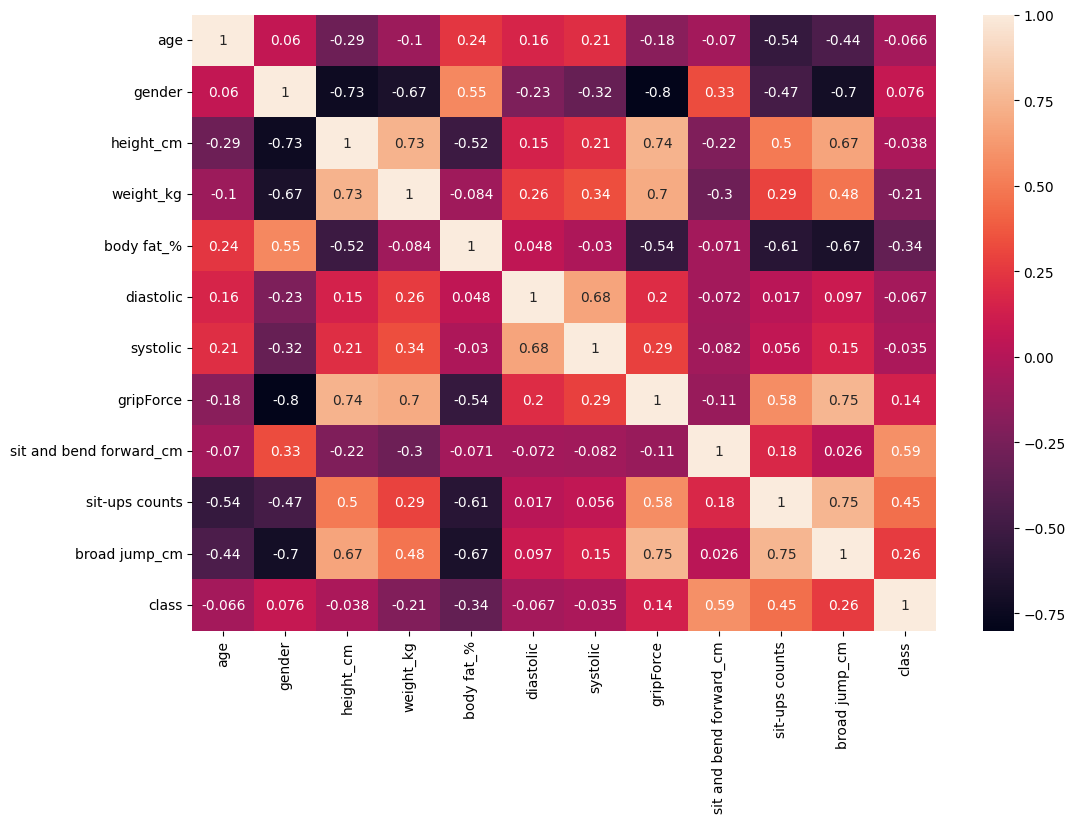

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

There are no strong linear relationships with `class` variables, which means, there is non-linear relation between `class` and the other variables.

We need to have an understanding of the range and distributions of all the variables. Which plot do you think will be hepful here?


Boxplot

<Axes: >

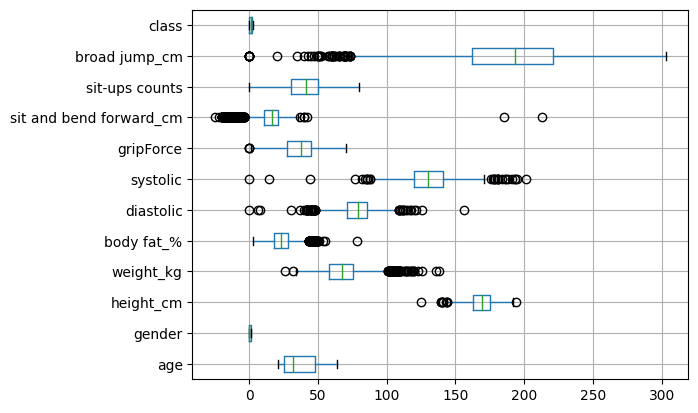

In [ ]:
df.boxplot(rot = 0, vert=False)

The distribution and range of all the features is quite different.

Let's have the independent and dependent variables separated into X and y.

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(13393, 11) (13393,)


Now we need to split the data for training and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (10847, 11) (10847,)
Valid :  (1206, 11) (1206,)
Test  :  (1340, 11) (1340,)


We have firstly splitted the dataset into dev and test data and then the dev data is further splitted into train and validation data.

Now that our data is prepared to be used for training, lets build the model using Tensorflow

Generally when features are normalized, neural network training is often more efficient


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train,y_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

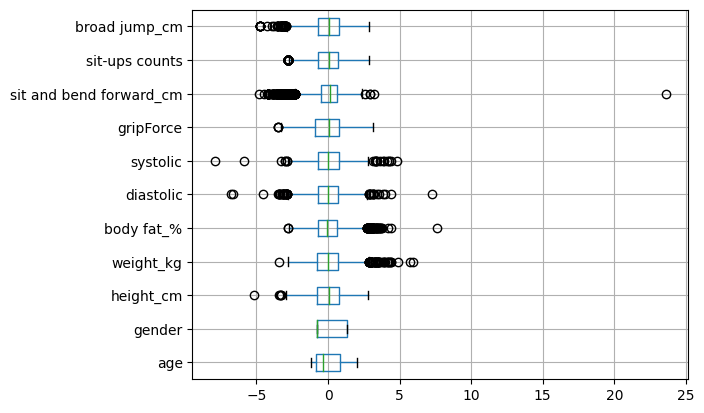

In [ ]:
pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot = 0, vert=False)

Now that our data is prepared to be used for training, lets build the model using Tensorflow

Before, we get started, let's explore Tensorflow website a bit
-- --



## Tensorflow


- We will start-off directly with importing and checking it version.

In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

- In TensorFlow 2, Keras has become the default high-level API for - TensorFlow.
- Because of Keras'es ability to write very simple code
- The complete keras API is now wrapped up as part of the TensorFlow installation and has become seamlessly integrated with TensorFlow.
- **You don't need to seperately install Keras now**.
- Even though it's the high-level API for TensorFlow, we'll be able to do most, if not all, of your model development using keras.
- If you want to do more complex stuff like designing your own activation function or any research work, you can do it using Tensorflow-2


There are two modules which we will start using right away.

### tf.keras Module

The first one is `tf.keras`, click on the module to see whats inside, or you can use the `dir()` function to get the list of contents as well.

In [ ]:
dir(tf.keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'export',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'saving',
 'utils']

Let's look at the various activation functions available inside keras

In [ ]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

### tf.data

- Other interesting module that we will use in further classes is `tf.data`
- We'll be looking at this further on in the course when we get to talking about **data pipelines**
- There, we will define our custom classes to load and pass different types of dataset like rows, images, text to NN as mini-batches

In [ ]:
dir(tf.data)

['AUTOTUNE',
 'Dataset',
 'DatasetSpec',
 'FixedLengthRecordDataset',
 'INFINITE_CARDINALITY',
 'Iterator',
 'IteratorSpec',
 'Options',
 'TFRecordDataset',
 'TextLineDataset',
 'ThreadingOptions',
 'UNKNOWN_CARDINALITY',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

We can write code in keras using two ways:
- Sequential API
- Functional API

But for this lecture, we will talk about the most used keras Sequential API which will help us in most of the Deep NN that we will study in this course.

-- --

## Keras Sequential API


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- We will now create an instance (or object) of the Sequential class and call it `model`.
- Its same as creating an instance as we did using some sklearn's model class, just that, now we will now define the model as well.
- Sequential model will take a list of layers as an argument.

Lets define a feed forward network with a single hidden layer.

In [ ]:
model = Sequential([
                    Dense(64, activation="relu"), #hidden dense layer with 64 neuron units
                    Dense(4, activation="softmax") #output layer with 4 units and softmax activation
])

- The activation argument is optional, and if you don't pass it, it will be a linear (or no) activation

#### Question: Why do we need activation function?
- It provides non linearity to problems.

#### Question: Give an example of a case when we wouldn't like to pass an activation?

- Output layer of regression model

#### Question: If we want to find out if there is a method to check the weights of model, how will you find that method?

Use dir(model)

- From dir(model) we can find out about the weights() method for sequential models.

#### Lets check the model weights

In [ ]:
#model.weights # should give some error

Looks like the model hasn't created the weights yet.

#### Passing input shape

- Notice that we haven't told the model about the input size yet, and thus, tensorflow doesn't have any information to create W and b yet.
- Optionally, we can pass the input size right away as well in the first layer.

In [ ]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,)),
                    Dense(4, activation="softmax")
])

In [ ]:
type(model.weights)

list

In [ ]:
for param in model.weights:
  print(param.shape)

(11, 64)
(64,)
(64, 4)
(4,)


Lets look at another way to define the same model

#### model.add()

- Instead of passing the list of layers as an argument while creating a model instance, we can use the `add` method.

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(11,)))
model.add(Dense(4, activation="softmax"))

### Optional Exercise: What if the input had been a multi-dimensional data?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_2D = Sequential([
                    Flatten(input_shape=(28, 28)), # flatten the data to make it (784,) to be based further
                    Dense(64, activation="relu"),
                    Dense(4, activation="softmax")
])

Note: We can also directly pass multi-dimensional input directly for which we will study different types of networks like convolution neural network in later modules.

### Model summary

- There is another short way to check dimensions and parameters of each layer
- we can do it using the printing model summary

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Giving custom names to the layers

- As you can see in the model summary, keras has provided the names by itself.
- At times, we might want to give custom names to the layer as well

In [ ]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(4, activation="softmax", name="output")
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                768       
                                                                 
 output (Dense)              (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- We can also plot the model as a graph
- And save it as a png file

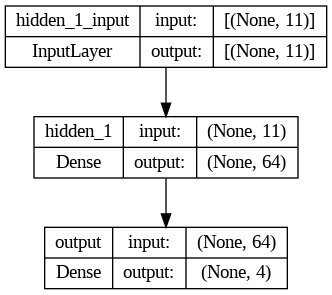

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

From the plot we can see that the first layer is the input layer and then the input and output shapes of each of layers `hidden_1` and `output` are given.

### Weights and Bias Initializer

- When we worked on NN from scratch, we intialised W with `np.random.rand` and b with `np.zeros`.
- We also learnt about various weight  initialization techniques
  - Glorot Normal
  
   $w^k_{ij} \sim N(0,\sigma_{ij})$, where $\sigma_{ij} = \frac{2}{fanin+fanout}$

  - Glorot Uniform
  
    $w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$
  - He Normal
    
    $N(0,\sigma)$, where $\sigma = \frac{2}{fanin}$

  - He uniform
  
   $Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$

- Now let see how keras implements them.
- The end results of the classification and regression gets affected by the initialization of the weights and biases.
- For now, we will just look at some methods of weights and bias initialization.




In Keras, in `Dense` layer,
1. the biases are set to zero (`zeros`) by default
2. the weights are set according to `glorot_uniform`, the Glorot uniform initialiser.


For example:
-  $$c = \frac{\sqrt{6}}{\sqrt{11+64}} = 0.28$$

for the first hidden layer of model as $fanin$ (input) is 11 and $fanout$(output) is 64


Note:

- There are several researches proposing different ways of randomly initialising the weights of the layers.
- But **`glorot_uniform` has been the most widely used** one in most of the Deep Learning frameworks today.


#### What if I want to initialise my own weights and bias? May be for my own research?

- Each layer has optional arguments `kernel_initialiser` and `bias_initialiser` to set the weights and biases respectively.

In [ ]:
model_X = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1", kernel_initializer='random_uniform', bias_initializer="zeros"),
                    Dense(4, activation="softmax", name="output", kernel_initializer='he_uniform', bias_initializer='ones')
])

We can totally go from scratch as well (only if we need to) using keras.initialiser submodule

In [ ]:
Dense(64, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
          bias_initializer=tf.keras.initializers.Constant(value=0.4),
          activation='relu')

- Let's try to retrieve the layers of the model.

In [ ]:
model.layers

- Lets look at how are they initialised, we can check how the weights distribution (optional).

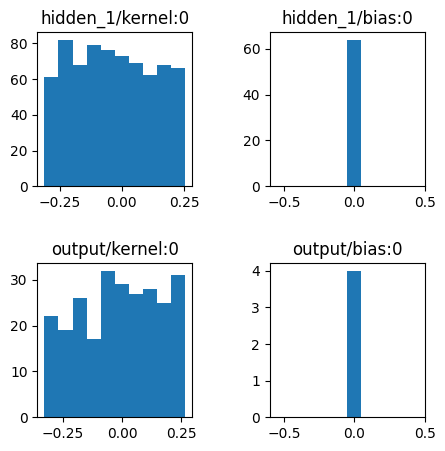

In [ ]:
# Plot histograms of weight and bias values
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

- layers() method consist of a list of layers.
- In the code, we are firstly getting all the weights and biases of the layers using `layer.weights[0/1]`, then converting them to a numpy array and then flattening all the arrays to just get an array of initialized weights and biases.
- From the above plots it can be observed that all the biases are intialized to zero by default.
-- --

## Compile - loss and optimizer



Until now, we have defined the model architecture.

After defining the model, we have to compile the model.

#### Question: What do you think, which specific information we should pass to model while compiling ?
1. Loss function - To measures the model performance as it trains
2. Optimizer (like Gradient Descent) - To performs the gradient update

We do this by using two arguments of the compile method `optimizer` and `loss`.

Lets take an example of a binary classification task here

In [ ]:
model_2C = Sequential([
          Dense(64, activation="relu", input_shape=(11,)),
          Dense(1, activation="sigmoid")])

# new piece of code
model_2C.compile(
    optimizer = "adam", # stochastic gradient descent, adam, rmsprop, adadelts
    loss = "binary_crossentropy", # sigmoid loss, # mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
    metrics = ["accuracy"]
)

- There are multiple options for optimisers, loss and metrics which we will discuss in detail later

- All these strings which we have passed as argument i.e. `sgd`, `binary_crossentropy` and `accuracy` are reference to some default objects defined in keras. They are called to string identifiers.
- We can also directly instantiate these custom objects here with the classes defined in keras submodules for example `opt = keras.optimizers.Adam(learning_rate=0.01)`
- We can even pass customized loss and optimizer functions in keras models.


#### Lets change the learning rate by initialising  a custom object

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
)

Optionally, we can define a list of metrics which we might want to track during the training, like accuracy

In [ ]:
model = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

Other available string identifiers to pass in `loss` parameter.

#### How sparse categorical crossentropy different from categorical cross-entropy?

1. Use `categorical_crossentropy` if target vector is one hot-encoded - [1,0,0,0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]
2. Use `sparse_categorical_crossentropy` if target vector is ordinal integer values - 0, 1, 2, 3

- We can use these objects when we need to change their arguments like a using different learning rate.
- We can change the cut-off from 0.5-0.7 or anything using this.
- These metrics will be calculated and saved after each epoch (one pass of whole data to update the model).

#### But what exactly is an epoch?
- When data is too big, data is passed in small batches instead of one big batch due to memory constraints. Each pass of mini-batch is called an iteration.
- Each pass of whole datasets is called an Epoch.

- One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.


Lets finally check if the loss and optimisers for the model are set. We can use the model attributes for getting these.

In [ ]:
model.loss

In [ ]:
model.optimizer

-- --
## Training the model using `fit` method

Training the model would mean updating the weights using the optimizer and loss functions on the dataset.



`model.fit(X_train, y_train)`

X_train = (num_samples, num_features)

y_train = (num_samples, num_classes) or y_train = (num_samples, )

Lets look at some other arguments of model.fit method

### Set the epochs

You might want to train the model for more than 1 epochs.

`model.fit(X_train, y_train, epochs=500)`

### Set the batch size

- Another option is to set the batch size, the default is 16.
- Usually, the batch size used are of the form $2^x$ - 4, 8, 16, 32, 64
- And we try to take as big of a bach size as GPU memory can manage.
- Setting up batch_size=16 means that 16 training samples are passed in single iteration.
- Num_iterations in an epoch = num_samples/batch_size

There are some other sophisticated arguments of `model.fit `which we will dicuss later as we progress.




Lets train our model! <br>

Here we have mentioned `validation_split = 0.1`, <br>
which means 10% of our training data will be used for validation  

- Seed in ML means intilization state of a pseudo random number generator.
- After setting the same seed whenever random() function is called we will get a specific way of generating numbers.
- If you use the same seed you will get exactly the same pattern of numbers during weights initializations, which will be helpful for us as if all of us run the code we will get the same output.

In [ ]:
def seed_everything(seed = 42):
    np.random.seed(seed)
    tf.random.set_seed(seed)


seed_everything()

Let's train for few epochs first and see what happens

In [ ]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val,y_val), verbose=1)

## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39

Epoch 1/10
43/43 [==============================] - 1s 7ms/step - loss: 1.4167 - accuracy: 0.2478 - val_loss: 1.3760 - val_accuracy: 0.3076
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 1.3473 - accuracy: 0.3408 - val_loss: 1.3173 - val_accuracy: 0.4104
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 1.2821 - accuracy: 0.4255 - val_loss: 1.2364 - val_accuracy: 0.4536
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 1.2012 - accuracy: 0.4622 - val_loss: 1.1440 - val_accuracy: 0.4925
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 1.1185 - accuracy: 0.4934 - val_loss: 1.0566 - val_accuracy: 0.5133
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 1.0448 - accuracy: 0.5331 - val_loss: 0.9800 - val_accuracy: 0.5531
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.9853 - accuracy: 0.5651 - val_loss: 0.9227 - val_accuracy: 0.5904
Epoch 8/10
43/43 [==

**Observe**
- Here we trained our model for 10 epochs
- `model.fit` is printing all the metrics like accuracy, loss, validation loss, validation accuracy etc.

#### Question: How can we use all this information and use it for analyising training process ?
- For this let's check what this `model.fit` is returning

### History

- `model.fit` returns a history object which contains the record of progress NN training.
- History object contains records of loss and metrics values for each epoch.
- History object is an example of something called "callback" (will study it later).

### Compiling and training the model
- Until now, we  have seen how to build a NN model, compile it with relevant loss function, optimizer and metrics to track while training.
- We also saw how we can train the model using the fit method for certain number of epochs and with certain batch_size.

Let's train model for 500 epochs and store training process inside a variable called **history**

In [ ]:
%%time
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split=0.1, verbose=1)

## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39

Epoch 1/500
39/39 [==============================] - 0s 4ms/step - loss: 0.8827 - accuracy: 0.6119 - val_loss: 0.8846 - val_accuracy: 0.6120
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8733 - accuracy: 0.6166 - val_loss: 0.8769 - val_accuracy: 0.6092
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.6198 - val_loss: 0.8727 - val_accuracy: 0.6120
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.6207 - val_loss: 0.8651 - val_accuracy: 0.6175
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8549 - accuracy: 0.6230 - val_loss: 0.8617 - val_accuracy: 0.6276
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.6273 - val_loss: 0.8562 - val_accuracy: 0.6249
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.6298 - val_loss: 0.8554 - val_accuracy: 0.6240
Epoch 8/500
3

- Lets try to plot histograms of model weights and baises to see if there is any difference after training
- **[Q] What will be the distributions now? Still glorot_uniform ?**

  - Weights now follow normal distribution
  - Biases are not Zero now


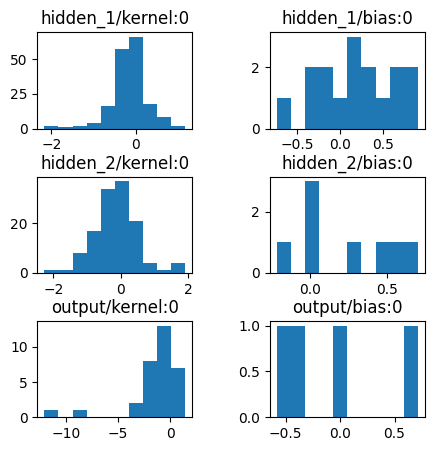

In [ ]:
# Plot histograms of weight and bias values after training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

***Question:*** Is one iteration / step is one forward and then one back propagation?

***Answer:***
- Yes, that is correct.

### `validation_data`

- We can also explicitly use a validation set (which was earlier created while splitting the data) using `validation_data` argument in `fit` method.
- But, we will have to re-initialise the model after defining with `validation_data`, else, the model will start getting trained from its current stage.
- Ideally, we should have written this code as a function, so that we don't have to write model definition again and again


In [ ]:
def create_model():
    model = Sequential([
                    Dense(32, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(16, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
    return model

model = create_model()

Also, this time, lets change the `verbose=0` to make the training process silent. This will prevent the printing of loss and other metrics for each epoch.

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=500, batch_size=512, verbose=0)

Lets look at the history object dictionary. It's an alternative to dir().
`__dict__` attribute can be used to retrieve all the keys associated with the object on which it is called.

In [ ]:
history.__dict__.keys()

We can see that history object's dictionary has another dictionary with key "history" inside it

We can also call the `history` method of the above object as it is available in keys associated with the `model.fit()`.

In [ ]:
history.history.keys()

model.fit() has saved all the loss and metrics values  for each epoch inside the `history` dictionary where all the values are stored in different lists.

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

Lets plot the loss and accuracy curves for both training and validation data

In [ ]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

- We can see that both training and validation loss decrease with epochs.
- After around 120 epochs, training loss still keeps on decreasing, but validation loss starts to increase.
- This means, **the model starts overfitting the training dataset after 120 epochs**.
- Params learnt after 120 epochs would be the one which are overfitting the training dataset.
- Later, **we will see ways to save intermediate model parameters** - **early stopping**.
- But for now, lets evaluate the model performance based on 500 epochs trained model only.
-- --


## Keras Functional API



In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
model_sequential = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

- Earlier we have created this model using Sequential API
- Now lets create same model using Functional API

In [ ]:
from tensorflow.keras.layers import Input

- In Sequential we passed input shape in the first layer
- But Here we will be using an additional layer : **Input layer**
- we're going to explicitly have a separate layer to represent the data input.

- Another main diference is `tf.keras.models.Model`
- Here instead of Sequential, here **we will be using Model Class**

### Keras Functional Model Class

- First we create an input layer with the shape of the dataframe

In [ ]:
inp1 = Input(shape=(11,))
inp2=Input(shape=(5,))

- Next we will be creating our first two layer of the model
- Instead of creating a list (as in Sequential)
- We will also pass previous layer in the current layer
- In first dense `hidden_1` we will pass `inp`
- And in second `hidden_1` we will pass `hidden_2`

In [ ]:
h1 = Dense(16, activation="relu", name="hidden_1")(inp)
h2 = Dense(4, activation="relu", name="hidden_2")(h1)
h3=Dense(4,activation="tanh" name="hidden_3")(inp2)

- Now we will create the final output layer

In [ ]:
out1 = Dense(4, activation="softmax", name="output")(h2)
out2=Dense(1, name="output")(h3)

- We have defined the flow of the model
- Finally,  to built a model using this directed graph
- We will use `tf.keras.models.Model`, and pass all the inputs and outputs

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model_functional = Model(inputs=[inp1,inp2], outputs=[out1,out2], name="simple_nn")

Let's generalize above code inside a function

In [ ]:
def create_model_functional():

  inp = Input(shape=(11,))

  h1 = Dense(16, activation="relu", name="hidden_1")(inp)
  h2 = Dense(8 , activation="relu", name="hidden_2")(h1)

  out = Dense(4, activation="softmax", name="output")(h2)

  model = Model(inputs=inp, outputs=out, name="simple_nn")
  return model

In [ ]:
model_functional = create_model_functional()

In [ ]:
model_functional.summary()

In [ ]:
#And, optionally, display the input and output shapes of each layer in the plotted graph:

tf.keras.utils.plot_model(model_functional,show_shapes=True)

In [ ]:
# let's create a little complex model using functional API's with more than one output

def create_model_multiple_output():
  inp = Input(shape=(11,))

  h1 = Dense(16, activation="relu", name="hidden_1")(inp)
  h2 = Dense(8 , activation="relu", name="hidden_2")(h1)
  h3 = Dense(4 , activation="relu", name="hidden_3")(h2)

  out1 = Dense(1, activation="sigmoid", name="output1")(h3)
  out2 = Dense(1, activation="relu", name="output2")(h3)

  model = Model(inputs=inp, outputs=[out1,out2], name="simple_nn")
  return model

# creating model with multiple output
model_multiple_output = create_model_multiple_output()
model_multiple_output.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])

# plotting model with multiple output
tf.keras.utils.plot_model(model_multiple_output,show_shapes=True)

## Prediction and Evaluation



Lets evaluate the model performance on different sets, we will carry out all predictions using the model created via sequential API

### Evaluate the model

`model.evaluate(X_test, y_test)`

- model.evaluate **returns the loss value & metrics value** for the model.
- It is important to note that, **weights/parameters are not updated during evaluation** (and prediction)
- This also means - **only forward pass, no backward pass**

Now lets evalute our models on training, validation and testing datasets

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

### Predictions

- If we need to get the prediction for an **unseen data**, we can use the `predict` method to get the predictions.
`model.predict(X_test)`

- It **returns raw output** from the model (i.e. **probabilities** of an observation belong to each one of the 4 class)

In [ ]:
pred = model.predict(X_test)
pred


####What will be the sum of probabilities of an observation belong to each of the 4 classes?
- 1

- As the model outputs the probabilities for all the observations and each observation can only belong to one of these 4 classes, therefore the sum of probs will be 1.

In [ ]:
np.sum(pred, axis=1)

#### How can we know the class an observation belongs to, using these 4 probability values?
We can find the index having the largest probability and that will be the predicted class.

In [ ]:
pred_class = np.argmax(pred, axis = 1)
pred_class

Now, to cross-check, we will again check accuracy of the model using sklearn's `accuracy_score`.

In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, pred_class)

print("Test acc: ", acc_score)

-- --
## Callbacks



Earlier, we saw

- with verbose=1, model training prints associated data after every epoch
- with verbose=0, model training prints nothing

#### What if we want to customise the printing behaviour?

Let's use something called **callbacks** to do this.

#### But, first what are callbacks?

A callback **defines a set of functions** which are **excuted at different stages of the training** procedure. <br>
For example: A callback function may run
1. function `on_epoch_begin` before every epoch
2. function `on_epoch_end` after every epoch
and such multiple functions.

#### How can these callbacks be useful?

They can be **used to view internal states of the model** during training.

- For example, we may **want to print loss, accuracy or lr every 2000th epoch**.
- For this, may be we can **add a condition like `if epoch%2000==0`** then only do certain task, example, printing loss, accuracy or lr

Lets create our own customized callback class for printing Loss and Acc for every 50th epoch

- The custom class will inherit from `tf.keras.callbacks.Callback`.
- Which means that all the attributes and methods available in the keras.callbacks.callback class will be available for our customized class, and we can also override them.

In [ ]:
class VerboseCallback(tf.keras.callbacks.Callback):
  # runs only before the training starts
  def on_train_begin(self, logs=None):
        print("Starting training...")

  # runs after every epoch
  def on_epoch_end(self, epoch, logs = None):
    if epoch % 50 == 0:
       print(f'Epoch {str(epoch).zfill(3)}', '- loss : ', logs['loss'], '- Acc : ', logs['accuracy'])

  # runs once training is finished
  def on_train_end(self, logs=None):
        print("...Finished training")

In the above code snippet we are printing a sentence at the start of training and also printing the loss and accuracy for each 50th epoch's end. We are also printing a sentence at the end of training.
- In the code snippet `logs` is the dictionary that callback methods take as an argument that will consist of the keys for quantities relevant to the current batch or epoch like loss, accuracy etc.

- We will have to **pass a list of callback objects** to `callbacks` argument  of the fit method
- (Optional) We **can pass callback objects to evaluate and predict** method as well.

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split=0.1, verbose=0, callbacks=[VerboseCallback()])

The parent class `tf.keras.callbacks.Callback` supports various kinds of methods which we can override

-  Global methods  <br>
   at the beginning/ending of training <br>

- Batch-level method  <br>
 at the beginning/ending of  a batch <br>

- Epoch-level method  <br>
 at the beginning/ending of an epoch <br>


  Example -
  ```
class TrainingCallback(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")

    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}, loss is {logs['loss']}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}, loss is {logs['loss']}, accuracy is {logs['accuracy']}")
        
    def on_train_end(self, logs=None):
        print("Finished training")

  ```


- There are some pre-defined callback classes such as CSVLogger, EarlyStopping, LearningRateScheduler.
- They can be useful for various tasks e.g..., EarlyStopping can be used to stop the training as soon as the validation loss starts to increase.

Other examples include:
1. CSVLogger - save history object in a csv file `csv_logger = keras.callbacks.CSVLogger("file_name.csv")
`
2. EarlyStopping - stop the training when model starts to overfit
3. ModelCheckpoint - saves the intermediate model weights
4. LearningRateScheduler - control/change Learning Rate in between epochs

we will use them in the later lectures

So far we have learnt about the following steps for using a model:
1. Defining a model.
2. Compiling the model using `model.compile()` with `loss` and `optimizers`
3. Training the model with `model.fit()`.
4. Predicting using a model through `model.predict()`.
5. Evaluating the performance using `model.evalulate()`.
6. Using callbacks for performing certain tasks during different stages of training process.

-- --

## Tensorboard


- It is always a **good practice to closely monitor the training process** - changes in the loss, performance, changes in the parameters.
- We do get the values of these attributes using `history` but we need to explicitly plot them to visualize.
- Lets learn about a **handy tool which we can use to visually track metrics, weights**


Tensorboard is a dashboard that allows us to visualise information regarding the training process like
- Metrics - loss, accuracy
- Visualise the model graphs
- Histograms of W, b, or other tensors as they change during training - distributions
- Displaying images, text, and audio data (in later lectures)

### Start Tensorboard

- We **don't need to install** tensorboard in **colab**.
- Else, we can do that using one of the possibilities

```
pip install tensorboard
conda install -c conda-forge tensorboard

```
We will directly load the Tensorboard to Colab.

Load tensorboard in the notebook.

In [ ]:
%load_ext tensorboard

- Now we have have to set a log directory, say `logs`


In [ ]:
log_folder = 'logs'

- TensorBoard will **store all the logs in this log directory**.
- It will read from these logs in order to display the various visualizations.
- If we want to reload the TensorBoard extension, we can use the reload magic method

In [ ]:
%reload_ext tensorboard

- Before saving the new logs to the folder, we might want to clear the current logs (if there are any).


In [ ]:
!rm -rf logs

Inorder to use Tensorboard, we need to import `tf.keras.callbacks.TensorBoard`

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

Callback arguments:
- **log_dir** - (Path)
 - directory where logs will be saved
 - This directory should not be used by any other callbacks.

- **update_freq** - (int/str)
 - how frequently losses/metrics are updated.
 - when set to  `batch`, lossess/ metrics will be updated after every batch/iteration
 - when set to an integer `N`, updation will be done after `N` batches
 - when set to 'epoch', updation will be done after every epoch

- **histogram_freq** - (int)
 - how frequently (in epochs)  histograms(Distribution of W) will be updated.
 - Setting this to 0 means, histograms will not be computed.
-**write_graph**   - (Bool), `True` if we want to visualize our training process
-**write_images** - (Bool), `True` if we want to visualize our model weights

In [ ]:
tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Now we will train our model again. <br>
This time using Tensorboard callback

In [ ]:
model = create_model()
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data = (X_val, y_val), verbose=0, callbacks=[tb_callback])

Let us now look at the various tabs on the TensorBoard dashboard.

- **Scalars**:  shows loss and metrics
- **Graphs** :  shows model training structure
- **distributions** : distribution of W & b
- **histograms** : histogram of W & b over epoch


Launch tensorboard using the following command line.

In [ ]:
%tensorboard --logdir={log_folder}